# "A Basic Neural Network: Differentiate Hand-Written Digits"

- badges: true
- author: Akshith Sriram

### Key Objectives:
- Building a neural network that differentiates two hand-written digits 3 and 8.
- Comparing the results of this Neural Network (NN) to that of a Logistic Regression (LR) model.

### Requirements:
- 'Kudzu' : A neural network library that was designed during our course by [Univ.AI](www.univ.ai). 
- MNIST Database

If MNIST is not installed, use the command `!pip install mnist` given below.
It can be run both from the command line and Jupyter Notebook.

In [1]:
!pip install mnist 

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.12/x64/bin/python -m pip install --upgrade pip' command.


#### Importing necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Preparing the Data

In [3]:
import mnist

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


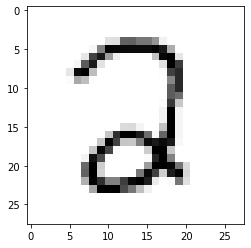

In [8]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [9]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pixel values in the 0 to 1 range

In [10]:
X_train = X_train/255.
X_test = X_test/255.

Setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [11]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [12]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

### Reshape the input data to create a linear array

In [13]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

### Importing appropriate functions from 'Kudzu'

In [14]:
from kudzu.layer import Sigmoid
from kudzu.layer import Relu
from kudzu.layer import Affine, Sigmoid

from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Dataloader, Sampler

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [15]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 251
config.bs = 50

### Initializing data to the variables

In [16]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [17]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.

Help taken from Anshuman's Notebook.

In [18]:
# layers for the Neural Network
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]
model_nn = Model(layers)

# layers for the Logistic Regression
layers_lr = [Affine("logits", 784, 1), Sigmoid("sigmoid")]
model_lr = Model(layers_lr)

In [19]:
# suffix _nn stands for Neural Network.
learner_nn = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(learner_nn, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_nn.set_callbacks([acc_nn])

In [20]:
print("====== Neural Network ======")
learner_nn.train_loop(dl)

====== Neural Network ======


Epoch 0, Loss 0.2455
Training Accuracy: 0.5772, Testing Accuracy: 0.5680



Epoch 10, Loss 0.1333
Training Accuracy: 0.8832, Testing Accuracy: 0.8982



Epoch 20, Loss 0.074
Training Accuracy: 0.9217, Testing Accuracy: 0.9350



Epoch 30, Loss 0.0539
Training Accuracy: 0.9390, Testing Accuracy: 0.9516



Epoch 40, Loss 0.0444
Training Accuracy: 0.9478, Testing Accuracy: 0.9561



Epoch 50, Loss 0.039
Training Accuracy: 0.9554, Testing Accuracy: 0.9612



Epoch 60, Loss 0.0354
Training Accuracy: 0.9590, Testing Accuracy: 0.9652



Epoch 70, Loss 0.0328
Training Accuracy: 0.9619, Testing Accuracy: 0.9657



Epoch 80, Loss 0.0308
Training Accuracy: 0.9636, Testing Accuracy: 0.9677



Epoch 90, Loss 0.0293
Training Accuracy: 0.9655, Testing Accuracy: 0.9682



Epoch 100, Loss 0.028
Training Accuracy: 0.9669, Testing Accuracy: 0.9703



Epoch 110, Loss 0.0269
Training Accuracy: 0.9685, Testing Accuracy: 0.9713



Epoch 120, Loss 0.026
Training Accuracy: 0.9696, Testing Accuracy: 0.9728



Epoch 130, Loss 0.0252
Training Accuracy: 0.9702, Testing Accuracy: 0.9728



Epoch 140, Loss 0.0244
Training Accuracy: 0.9711, Testing Accuracy: 0.9728



Epoch 150, Loss 0.0238
Training Accuracy: 0.9722, Testing Accuracy: 0.9728



Epoch 160, Loss 0.0232
Training Accuracy: 0.9729, Testing Accuracy: 0.9728



Epoch 170, Loss 0.0226
Training Accuracy: 0.9736, Testing Accuracy: 0.9733



Epoch 180, Loss 0.0221
Training Accuracy: 0.9746, Testing Accuracy: 0.9733



Epoch 190, Loss 0.0215
Training Accuracy: 0.9755, Testing Accuracy: 0.9728



Epoch 200, Loss 0.0211
Training Accuracy: 0.9757, Testing Accuracy: 0.9728



Epoch 210, Loss 0.0206
Training Accuracy: 0.9763, Testing Accuracy: 0.9733



Epoch 220, Loss 0.0202
Training Accuracy: 0.9769, Testing Accuracy: 0.9728



Epoch 230, Loss 0.0198
Training Accuracy: 0.9776, Testing Accuracy: 0.9723



Epoch 240, Loss 0.0194
Training Accuracy: 0.9786, Testing Accuracy: 0.9723



Epoch 250, Loss 0.019
Training Accuracy: 0.9792, Testing Accuracy: 0.9728



0.03856605901850016

### Logistic Regression based Implementation.

In [21]:
learner_lr = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(learner_lr, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_lr.set_callbacks([acc_lr])

In [22]:
print("====== Logistic Regression ======")
learner_lr.train_loop(dl)

====== Logistic Regression ======
Epoch 0, Loss 0.263
Training Accuracy: 0.6014, Testing Accuracy: 0.6179



Epoch 10, Loss 0.107
Training Accuracy: 0.9015, Testing Accuracy: 0.9178



Epoch 20, Loss 0.0811
Training Accuracy: 0.9259, Testing Accuracy: 0.9355



Epoch 30, Loss 0.0694
Training Accuracy: 0.9357, Testing Accuracy: 0.9486



Epoch 40, Loss 0.0624
Training Accuracy: 0.9417, Testing Accuracy: 0.9536



Epoch 50, Loss 0.0577
Training Accuracy: 0.9453, Testing Accuracy: 0.9587



Epoch 60, Loss 0.0542
Training Accuracy: 0.9480, Testing Accuracy: 0.9592



Epoch 70, Loss 0.0515
Training Accuracy: 0.9506, Testing Accuracy: 0.9617



Epoch 80, Loss 0.0494
Training Accuracy: 0.9516, Testing Accuracy: 0.9622



Epoch 90, Loss 0.0477
Training Accuracy: 0.9530, Testing Accuracy: 0.9622



Epoch 100, Loss 0.0462
Training Accuracy: 0.9538, Testing Accuracy: 0.9632



Epoch 110, Loss 0.045
Training Accuracy: 0.9546, Testing Accuracy: 0.9632



Epoch 120, Loss 0.0439
Training Accuracy: 0.9552, Testing Accuracy: 0.9642



Epoch 130, Loss 0.0429
Training Accuracy: 0.9559, Testing Accuracy: 0.9642



Epoch 140, Loss 0.0421
Training Accuracy: 0.9569, Testing Accuracy: 0.9642



Epoch 150, Loss 0.0413
Training Accuracy: 0.9580, Testing Accuracy: 0.9642



Epoch 160, Loss 0.0406
Training Accuracy: 0.9582, Testing Accuracy: 0.9662



Epoch 170, Loss 0.04
Training Accuracy: 0.9588, Testing Accuracy: 0.9662



Epoch 180, Loss 0.0394
Training Accuracy: 0.9597, Testing Accuracy: 0.9662



Epoch 190, Loss 0.0389
Training Accuracy: 0.9598, Testing Accuracy: 0.9667



Epoch 200, Loss 0.0384
Training Accuracy: 0.9600, Testing Accuracy: 0.9667



Epoch 210, Loss 0.038
Training Accuracy: 0.9604, Testing Accuracy: 0.9667



Epoch 220, Loss 0.0376
Training Accuracy: 0.9609, Testing Accuracy: 0.9662



Epoch 230, Loss 0.0372
Training Accuracy: 0.9611, Testing Accuracy: 0.9662



Epoch 240, Loss 0.0368
Training Accuracy: 0.9613, Testing Accuracy: 0.9662



Epoch 250, Loss 0.0365
Training Accuracy: 0.9613, Testing Accuracy: 0.9657



0.03804914724950158

### Comparing results of NN and LR

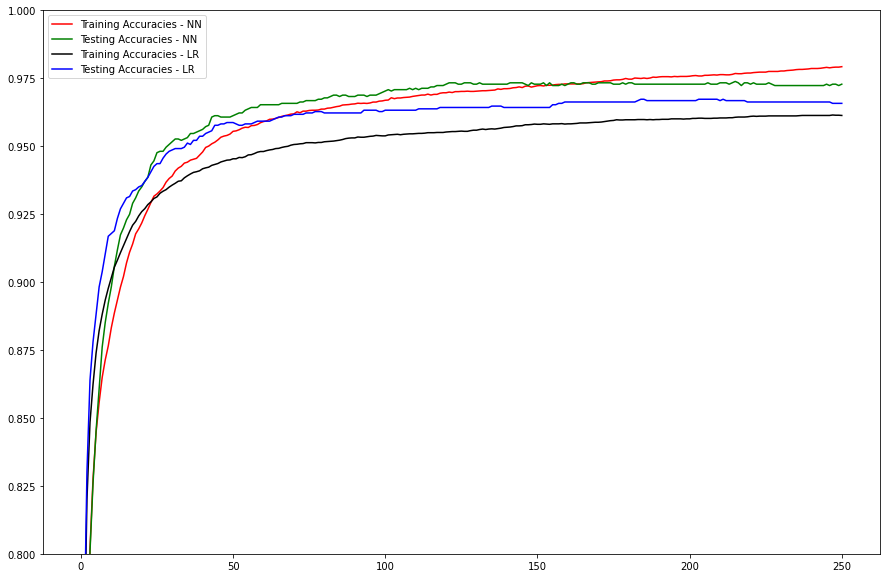

In [23]:
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")

plt.ylim(0.8, 1)

plt.legend()



### From the plot, we can observe the following:
- Neural Network achieves higher accuracy than the Logistic Regression model.
- This apparently, is because of overfitting, i.e. NN captures more noise than data.
- Testing accuracy of NN drops below the Training accuracy at higher epochs. This explains the over-fitting on training data.
- Logistic Regression gives a reliable accuracy, without the above mentioned problem.


### Moving till the last but one layer (excluding it).
#### Plotting the outputs of this layer of the NN.

In [24]:
model_new = Model(layers[:-2])

In [25]:
plot_testing = model_new(testing_xdata)

Text(0.5, 1.0, 'Outputs')

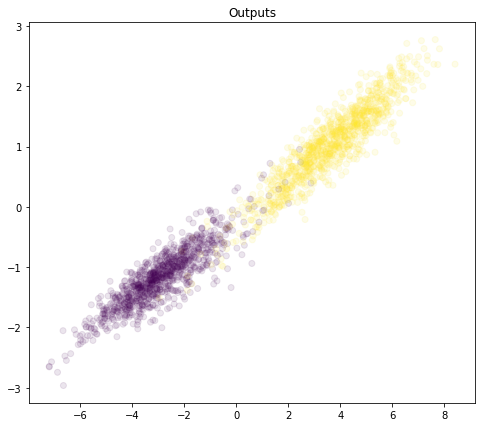

In [26]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

### Plotting probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
# Adjust the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_grid_flat = np.ravel(x_grid)
y_grid_flat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_grid_flat, y_grid_flat)).T

# x_grid and y_grid are of size 100 x 100
probability_contour = model_prob(X).reshape(100,100) 

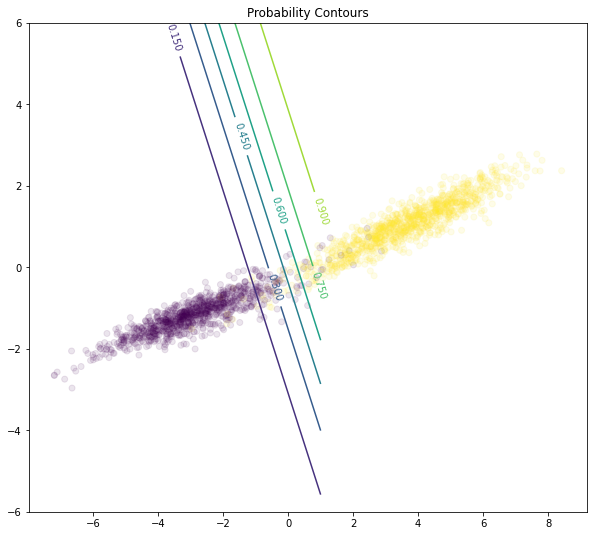

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,probability_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );